In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../model_json/make_json_program/cnn')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_auto_encoder_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch

In [2]:
!pwd

/Users/info/Desktop/lab/program/plot_branch_node/forward/plot


In [3]:
make_auto_encoder_json.make_json()

In [4]:
json_file = open('../model_json/json/auto_encoder.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_features': 784,
  'out_features': 128,
  'layer_type': 'input',
  'processing_type': 'linear'},
 'layer1': {'input_features': 128,
  'out_features': 64,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer2': {'input_features': 64,
  'out_features': 12,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer3': {'input_features': 12,
  'out_features': 3,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer4': {'input_features': 3,
  'out_features': 12,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer5': {'input_features': 12,
  'out_features': 64,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer6': {'input_features': 64,
  'out_features': 128,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer7': {'input_features': 128,
  'out_features': 784,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
        
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))

    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
branch_list

array([128., 128., 128., ..., 784., 784., 784.])

(array([219., 848.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 128.]),
 array([  3. ,  81.1, 159.2, 237.3, 315.4, 393.5, 471.6, 549.7, 627.8,
        705.9, 784. ]),
 <a list of 10 Patch objects>)

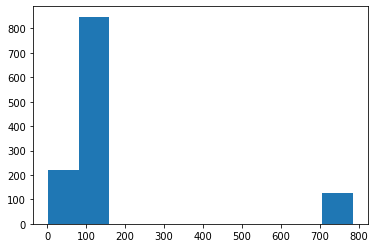

In [6]:
plt.hist(branch_list)